In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# t5 = pd.read_csv('t5_scores.csv')
# llama2 = pd.read_csv('llama2_scores.csv')
# gpt35 = pd.read_csv('gpt3.5_scores.csv')
# gpt4 = pd.read_csv('gpt4_scores.csv')
# claude = pd.read_csv('claude_scores.csv')

In [ ]:
# combined_df = t5[['dialogue index', 'test_score1']].rename(columns={'test_score1': 't5_scores'})
# combined_df["gpt35_scores"] = gpt35["test_score1"]
# combined_df["gpt4_scores"] = gpt4["test_score1"]
# combined_df["llama2_scores"] = llama2["test_score"]
# combined_df["claude_scores"] = claude["test_score1"]
# combined_df["exchange_count"] = t5["exchange_count"].astype(int)
# combined_df["dialogue_length"] = t5["dialogue_length"]
# combined_df.head()

,dialogue index,t5_scores,gpt35_scores,gpt4_scores,llama2_scores,claude_scores,exchange_count,dialogue_length
0,2,0.00,0.600,0.80,0.833,1.000,4,moderate
1,3,0.33,0.750,0.75,0.800,0.800,4,moderate
2,4,0.40,0.428,0.60,0.800,0.800,4,moderate
3,5,0.75,0.800,0.90,0.670,1.000,4,moderate
4,6,0.25,0.800,0.90,0.670,0.875,6,moderate


In [ ]:
# combined_df.to_csv('combined_scores.csv', index=False)

In [19]:
combined_df = pd.read_csv('combined_scores.csv')
combined_df.head()

,dialogue index,t5_scores,gpt35_scores,gpt4_scores,llama2_scores,claude_scores,exchange_count,dialogue_length
0,2,0.00,0.600,0.80,0.833,1.000,4,moderate
1,3,0.33,0.750,0.75,0.800,0.800,4,moderate
2,4,0.40,0.428,0.60,0.800,0.800,4,moderate
3,5,0.75,0.800,0.90,0.670,1.000,4,moderate
4,6,0.25,0.800,0.90,0.670,0.875,6,moderate


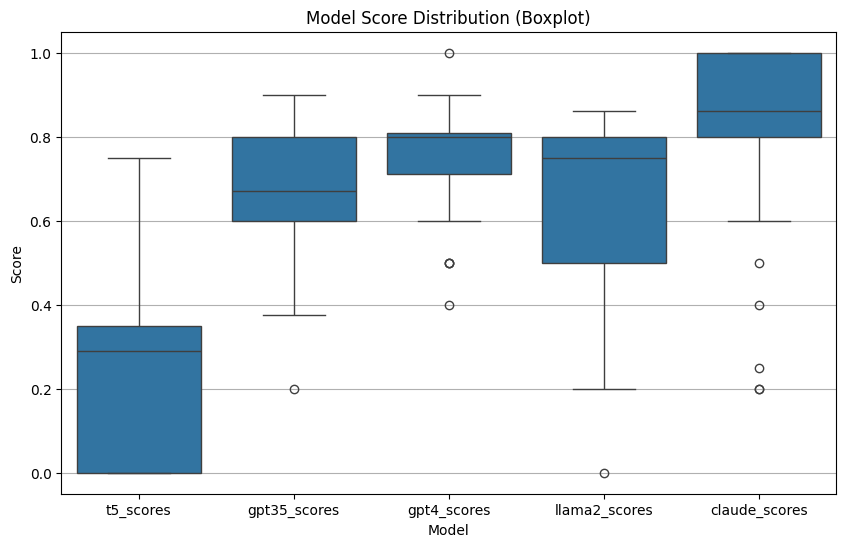

In [22]:
plot_data = combined_df.melt(
    id_vars=["dialogue index", "exchange_count", "dialogue_length"], 
    value_vars=["t5_scores", "gpt35_scores", "gpt4_scores", "llama2_scores", "claude_scores"],
    var_name="model", 
    value_name="score"
)

plt.figure(figsize=(10,6))
sns.boxplot(x="model", y="score", data=plot_data)
plt.title("Model Score Distribution (Boxplot)")
plt.xlabel("Model")
plt.ylabel("Score")
plt.grid(axis="y")
plt.show()

In [31]:
# # Re-melt your dataframe if needed
# plot_data = combined_df.melt(
#     id_vars=["dialogue index", "exchange_count", "dialogue_length"], 
#     value_vars=["t5_scores", "gpt35_scores", "gpt4_scores", "llama2_scores", "claude_scores"],
#     var_name="model", 
#     value_name="score"
# )

# # Define color palette manually
# custom_palette = {
#     "t5_scores": "#e78ac3",
#     "gpt35_scores": "#fc8d62",
#     "gpt4_scores": "#8da0cb",
#     "llama2_scores": "#66c2a5",
#     "claude_scores": "#ffd92f"
# }

# plt.figure(figsize=(10,6))
# sns.boxplot(x="model", y="score", data=plot_data, palette=custom_palette)
# plt.title("Model Score Distribution")
# plt.xlabel("Model")
# plt.ylabel("Score")
# plt.grid(axis="y")
# plt.savefig('boxplot1.png', dpi=300, bbox_inches='tight')
# plt.show()

In [32]:
# # Set a nice style
# sns.set(style="whitegrid")

# # List of models and their corresponding score columns
# models = {
#     "T5": "t5_scores",
#     "GPT-3.5": "gpt35_scores",
#     "GPT-4": "gpt4_scores",
#     "Llama2": "llama2_scores",
#     "Claude": "claude_scores"
# }
# length_order = ["short", "moderate", "long"]

# # Iterate over each model to create a separate boxplot
# for model_name, score_col in models.items():
#     plt.figure(figsize=(6, 4))
    
#     sns.boxplot(
#         x="dialogue_length",
#         y=score_col,
#         data=combined_df,
#         order=length_order,
#         palette="pastel"  # you can change palette if you want
#     )
    
#     plt.title(f"{model_name} Score Distribution by Dialogue Length")
#     plt.xlabel("Dialogue Length Category")
#     plt.ylabel("Score")
#     plt.ylim(-0.2, 1.05)  # Keep y-axis consistent across plots for easier comparison
#     plt.grid(axis="y", linestyle="--", alpha=0.7)
#     plt.savefig(f'boxplot{model_name}.png', bbox_inches='tight')

#     plt.show()

In [40]:
# First table: average score per model
avg_scores_per_model = combined_df[[
    "t5_scores", "gpt35_scores", "gpt4_scores", "llama2_scores", "claude_scores"
]].mean().round(2).to_frame(name="Average Score")

avg_scores_per_model

,Average Score
t5_scores,0.25
gpt35_scores,0.67
gpt4_scores,0.76
llama2_scores,0.65
claude_scores,0.84


In [35]:
avg_scores_by_length = combined_df.groupby("dialogue_length")[[
    "t5_scores", "gpt35_scores", "gpt4_scores", "llama2_scores", "claude_scores"
]].mean().round(2)

# Reorder the index so it's ["short", "moderate", "long"]
avg_scores_by_length = avg_scores_by_length.loc[["short", "moderate", "long"]]
avg_scores_by_length

,t5_scores,gpt35_scores,gpt4_scores,llama2_scores,claude_scores
dialogue_length,,,,,
short,0.25,0.63,0.75,0.63,0.84
moderate,0.25,0.68,0.78,0.68,0.86
long,0.28,0.74,0.73,0.62,0.82
